In [13]:
from skimage.morphology import disk
from skimage.morphology import square
from skimage.io import imread
from skimage.io import imshow
from skimage.io import imsave
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

In [14]:
pic = imread('pic.png')
selem = square(4)*255

In [15]:
def dilation(image, selem, origin=tuple(map(lambda x: x//2, selem.shape)),threshold = 200):
    result = image.copy()
   
    result_y, result_x = result.shape
    selem_y, selem_x = selem.shape
    origin_y, origin_x = origin
    
    for i, row in enumerate(image[origin_y:result_y-selem_y + origin_y, origin_x:result_x-selem_x + origin_x]):
        for j, elem in enumerate(row):
            if(image[i+origin_y,j+origin_x] > threshold):
                result[i:i+selem_y,j:j+selem_x] |= selem

    return result    

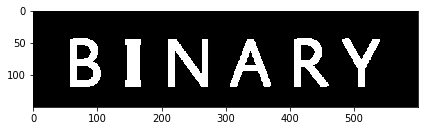

In [16]:
dil = dilation(pic,selem)
imshow(dil)

In [17]:
def same(elem1, elem2):
    y,x = elem1.shape
    for i in range(y):
        for j in range(x):
            if(elem1[i,j] > 200 and elem2[i,j] == 0):
                return False
    
    return True
    
    
def erosion(image, selem, origin=map(lambda x: x//2, selem.shape)):   
    image_y, image_x = image.shape
    selem_y, selem_x = selem.shape
    origin_y, origin_x = origin
    
    # создаю копию image с рамкой под selem
    external = np.tile(0, (image_y+selem_y, image_x+selem_x) )
    external[origin_y:origin_y+image_y,origin_x:origin_x+image_x] = image.copy()
    external = img_as_ubyte(external)
    external_y, external_x = external.shape
    res = external.copy()
    
    for i in range(0, image_y):
        for j in range(0, image_x):
            cut_lx, cut_rx, cut_ly,cut_ry = j, j+selem_x, i, i+selem_y
            cut = external[cut_ly:cut_ry, cut_lx:cut_rx]
            if (not same(selem, cut)):
                res[i+origin_y,j+origin_x] = 0
    
    return res

/home/konstantin/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/konstantin/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:184: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


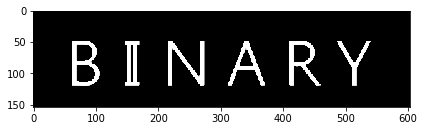

In [18]:
er = erosion(pic,selem)
imshow(er)

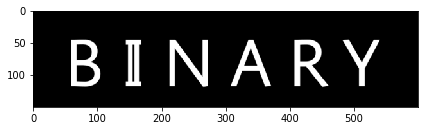

In [20]:
imshow(pic)
imsave('my_dilation.png', dil)
imsave('my_erosion.png', er)